In [10]:
import pandas as pd

file = pd.read_csv("Social_Network_Ads.csv")
df = pd.DataFrame(file)
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


<AxesSubplot:xlabel='Purchased', ylabel='count'>

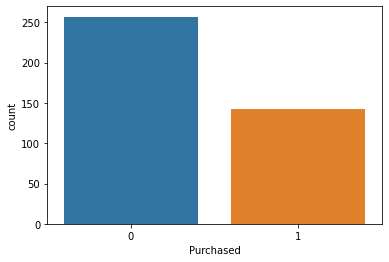

In [17]:
import seaborn as sns

sns.countplot(x = df.Purchased)

In [12]:
df.shape

(400, 5)

<AxesSubplot:xlabel='Gender', ylabel='count'>

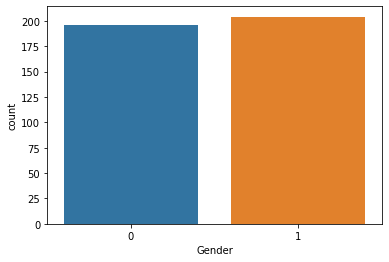

In [21]:
# changing string values in column Gender into binary ones

df["Gender"] = df["Gender"].map({"Female": 1, "Male": 0})
sns.countplot(x = df.Gender)

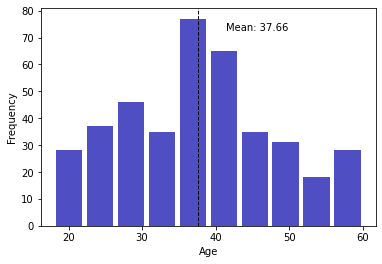

In [27]:
import matplotlib.pyplot as plt

# age distribution

n, bins, patches = plt.hist(x=df["Age"], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.axvline(df["Age"].mean(), color='k', linestyle='dashed', linewidth=1)
min_ylim, max_ylim = plt.ylim()
plt.text(df["Age"].mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(df["Age"].mean()))
plt.show()

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = df[["Gender", "Age", "EstimatedSalary"]]
y = df["Purchased"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40)
logreg = LogisticRegression(random_state=16, max_iter=200)

logreg.fit(X_train, y_train)

y_pred = logreg.predict(X_test)

In [30]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[66,  0],
       [34,  0]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

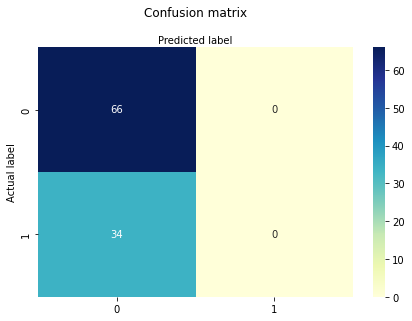

In [31]:
import numpy as np

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
from sklearn.metrics import classification_report

target_names = ['no purchase', 'purchased']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 no purchase       0.66      1.00      0.80        66
   purchased       0.00      0.00      0.00        34

    accuracy                           0.66       100
   macro avg       0.33      0.50      0.40       100
weighted avg       0.44      0.66      0.52       100



C:\Users\Larysa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Larysa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Larysa\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.metrics import accuracy_score

test_accuracy = logreg.fit(X_train, y_train).score(X_test, y_test).round(2)
training_accuracy = accuracy_score(y_train,logreg.fit(X_train, y_train).predict(X_train)).round(2)

print(f"Training accuracy: {training_accuracy}, test accuracy: {test_accuracy}")

Training accuracy: 0.64, test accuracy: 0.66


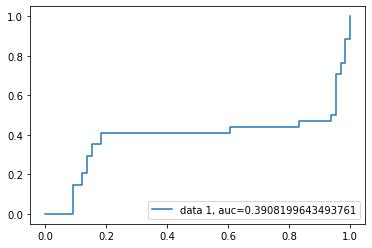

In [36]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [37]:
logreg.coef_[0]

array([-7.68620433e-11, -2.24543603e-09, -1.97730430e-06])

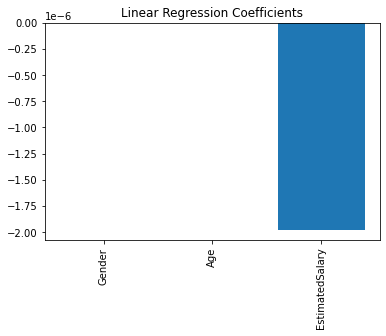

In [40]:
plt.figure()
col_names = df[["Gender", "Age", "EstimatedSalary"]]
plt.bar(range(len(logreg.coef_[0])), logreg.coef_[0])
plt.xticks(range(len(logreg.coef_[0])), col_names[:-2], rotation=90)
plt.title("Linear Regression Coefficients")
plt.show()